In [1]:
import random
import matplotlib.pyplot as plt

class Bandit:
    # Bandit class. Each spin provides some probability p of hitting the jackpot. 
    # The probability is hidden from users by default
    def __init__(self, mean: float, name: str):
        self._mean = mean
        self._name = name

    def __str__(self):
        return self._name

    def spin(self):
        return random.gauss(self._mean, 1)

In [2]:
class Frac:
    def __init__(self, num: int, denom: int, initial_value: float):
        self._num = num
        self._denom = denom
        self._init_val = initial_value

    def get_value(self):
        if self._denom == 0:
            return self._init_val
        return self._num / self._denom


In [3]:
from typing import List
import heapq

class Model:
    # Model class. Remembers the state payoffs of each bandit over time.
    # Includes a chooseNext function, which decides which bandit is the next most likely to provide 
    # success. Uses epsilon probability for exploration over exploitation. 
    def __init__(self, epsilon: float, bandits: List[Bandit]):
        self._eps = epsilon
        self._bandits = bandits
        self._iter = 0
        self._records = {bandit: Frac(0, 0, 0) for bandit in bandits}
        self._top_bandit = (None, 0)

    def _pick(self) -> Bandit:
        if random.random() <= self._eps: # or self._iter < len(self._bandits):
            retval = self._bandits[random.randrange(len(self._bandits))]
        else: 
            top_value = -10
            for bandit in self._bandits:
                if self._records[bandit].get_value() > top_value:
                    top_value = self._records[bandit].get_value()
                    self._top_bandit = (bandit, top_value)
            retval = self._top_bandit[0]
            
        self._iter += 1
        return retval

    def _update(self, bandit: Bandit, value: int):
        self._records[bandit]._denom += 1 
        self._records[bandit]._num += value

    def pick_and_spin(self):
        bandit = self._pick()
        value = bandit.spin()
        self._update(bandit, value)
        return value

    def evaluate(self):
        print("==============")
        print(f"Evaluation status of {len(self._bandits)} bandits:")
        for record in self._records.items():
            print(f"Bandit {record[0]} has expected value of {record[1]._num} over {record[1]._denom} tries. Value: {record[1].get_value()}")
        print("---------")
        print(f"Top bandit is {self._top_bandit[0]} with a value of {self._top_bandit[1]}")
        print("==============")


In [4]:
import torch

In [5]:
def evaluate_epsilon(epsilon):
    values = torch.zeros((2000, 1000))
    for i in range(2000):
        bandits = [
            Bandit(random.gauss(0, 1), "bandit1"),
            Bandit(random.gauss(0, 1), "bandit2"),
            Bandit(random.gauss(0, 1), "bandit3"),
            Bandit(random.gauss(0, 1), "bandit4"),
            Bandit(random.gauss(0, 1), "bandit5"),
            Bandit(random.gauss(0, 1), "bandit6"),
            Bandit(random.gauss(0, 1), "bandit7"),
            Bandit(random.gauss(0, 1), "bandit8"),
            Bandit(random.gauss(0, 1), "bandit9"),
            Bandit(random.gauss(0, 1), "bandit10")
        ]
        model = Model(epsilon, bandits)
        for j in range(1000):
            values[i, j] = (model.pick_and_spin())
    return values

In [10]:
values0 = evaluate_epsilon(0)
values001 = evaluate_epsilon(0.01)
values01 = evaluate_epsilon(0.1)
values5 = evaluate_epsilon(0.5)

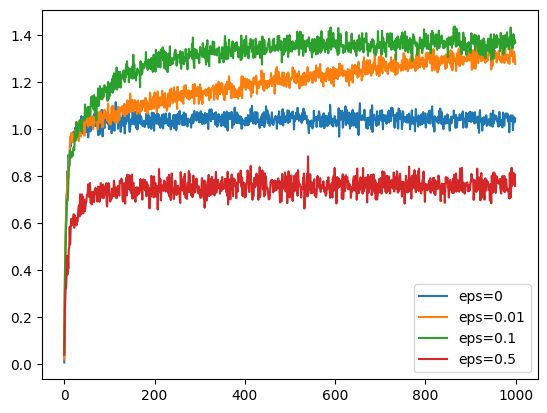

In [11]:
plt.plot(values0.mean(0), label='eps=0')
plt.plot(values001.mean(0), label='eps=0.01')
plt.plot(values01.mean(0), label='eps=0.1')
plt.plot(values5.mean(0), label='eps=0.5')
plt.legend()